<a href="https://colab.research.google.com/github/vianardia/vianardia.github.io/blob/main/Vian_ardia_zena_TUGAS%20SPK_Metode%20Mora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print("IMPLEMENTASI METODE MOORA")
print("=" * 50)

IMPLEMENTASI METODE MOORA


In [ ]:
# Data dari Excel
alternatives = ['A1', 'A2', 'A3', 'A4']
criteria = ['C1', 'C2', 'C3', 'C4', 'C5']

In [ ]:
# Matrix keputusan
decision_matrix = np.array([
    [150.0, 15.0, 2.0, 2.0, 3.0],
    [500.0, 200.0, 2.0, 3.0, 2.0],
    [200.0, 10.0, 3.0, 1.0, 3.0],
    [350.0, 100.0, 3.0, 1.0, 2.0]
])

In [8]:
# Tipe optimasi (1 untuk MAX, -1 untuk MIN)
optimization_type = np.array([-1, 1, 1, -1, 1])  # Sesuai dengan MIN/MAX di Excel

In [9]:
# Bobot kriteria
weights = np.array([0.25, 0.15, 0.3, 0.25, 0.05])

print("\n1. Matrix Keputusan Awal:")
df_decision = pd.DataFrame(decision_matrix,
                         index=alternatives,
                         columns=criteria)
print(df_decision)


1. Matrix Keputusan Awal:
       C1     C2   C3   C4   C5
A1  150.0   15.0  2.0  2.0  3.0
A2  500.0  200.0  2.0  3.0  2.0
A3  200.0   10.0  3.0  1.0  3.0
A4  350.0  100.0  3.0  1.0  2.0


In [10]:
# Normalisasi
# Menghitung pembagi (akar dari jumlah kuadrat)
denominators = np.sqrt(np.sum(decision_matrix**2, axis=0))
print("\nPembagi (Akar dari jumlah kuadrat):")
for i, denominator in enumerate(denominators):
    print(f"{criteria[i]}: {denominator:.3f}")


Pembagi (Akar dari jumlah kuadrat):
C1: 659.545
C2: 224.332
C3: 5.099
C4: 3.873
C5: 5.099


In [11]:
# Matrix normalisasi
normalized_matrix = decision_matrix / denominators
print("\n2. Matrix Normalisasi:")
df_normalized = pd.DataFrame(normalized_matrix,
                           index=alternatives,
                           columns=criteria)
print(df_normalized)


2. Matrix Normalisasi:
          C1        C2        C3        C4        C5
A1  0.227429  0.066865  0.392232  0.516398  0.588348
A2  0.758098  0.891534  0.392232  0.774597  0.392232
A3  0.303239  0.044577  0.588348  0.258199  0.588348
A4  0.530669  0.445767  0.588348  0.258199  0.392232


In [12]:
# Normalisasi terbobot
weighted_normalized = normalized_matrix * weights
print("\n3. Matrix Normalisasi Terbobot (Optimasi Nilai Atribut):")
df_weighted = pd.DataFrame(weighted_normalized,
                         index=alternatives,
                         columns=criteria)
print(df_weighted)


3. Matrix Normalisasi Terbobot (Optimasi Nilai Atribut):
          C1        C2        C3        C4        C5
A1  0.056857  0.010030  0.117670  0.129099  0.029417
A2  0.189525  0.133730  0.117670  0.193649  0.019612
A3  0.075810  0.006687  0.176505  0.064550  0.029417
A4  0.132667  0.066865  0.176505  0.064550  0.019612


In [13]:
# Menghitung nilai maximum dan minimum
max_values = np.zeros(len(alternatives))
min_values = np.zeros(len(alternatives))

for i in range(len(alternatives)):
    max_values[i] = sum(weighted_normalized[i, j] for j in range(len(criteria))
                       if optimization_type[j] == 1)
    min_values[i] = sum(weighted_normalized[i, j] for j in range(len(criteria))
                       if optimization_type[j] == -1)


In [14]:
# Menghitung Yi (MAX-MIN)
yi_values = max_values - min_values

In [15]:
# Membuat dataframe hasil
results = pd.DataFrame({
    'Alternatif': alternatives,
    'Maximum': max_values,
    'Minimum': min_values,
    'Yi (MAX-MIN)': yi_values
})

In [16]:
# Menambahkan ranking
results['Rank'] = results['Yi (MAX-MIN)'].rank(ascending=False).astype(int)
results = results.sort_values('Yi (MAX-MIN)', ascending=False)

print("\n4. Nilai Yi dan Perangkingan:")
print(results)


4. Nilai Yi dan Perangkingan:
  Alternatif   Maximum   Minimum  Yi (MAX-MIN)  Rank
2         A3  0.212608  0.140360      0.072249     1
3         A4  0.262981  0.197217      0.065764     2
0         A1  0.157117  0.185957     -0.028840     3
1         A2  0.271011  0.383174     -0.112162     4


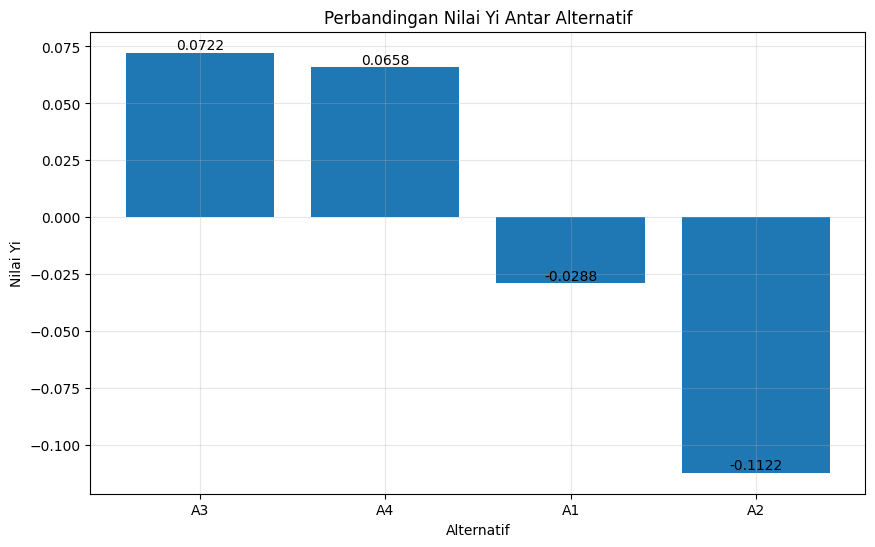

In [17]:
# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(results['Alternatif'], results['Yi (MAX-MIN)'])
plt.title('Perbandingan Nilai Yi Antar Alternatif')
plt.xlabel('Alternatif')
plt.ylabel('Nilai Yi')
plt.grid(True, alpha=0.3)
for i, v in enumerate(results['Yi (MAX-MIN)']):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

In [18]:
# Kesimpulan
best_alternative = results.iloc[0]
print("\nKESIMPULAN:")
print(f"Nilai preferensi tertinggi yang diperoleh dari alternatif investasi pemeliharaan sarana TI,")
print(f"sebesar {best_alternative['Yi (MAX-MIN)']:.3f}, secara kuat mendukung keputusan untuk memprioritaskan proyek ini.")
print("Hasil analisis ini memberikan dasar yang kuat untuk mengambil tindakan yang diperlukan.")


KESIMPULAN:
Nilai preferensi tertinggi yang diperoleh dari alternatif investasi pemeliharaan sarana TI,
sebesar 0.072, secara kuat mendukung keputusan untuk memprioritaskan proyek ini.
Hasil analisis ini memberikan dasar yang kuat untuk mengambil tindakan yang diperlukan.
